In [75]:
import pandas as pd

In [76]:
cmp = pd.read_csv("D:/Computer Sciences/Data Science/carprice.csv")
cmp


,Car_Model,Mileage,Sell_Price,Age
0,BMW_X5,69000,18000,6
1,BMW_X5,35000,34000,3
2,BMW_X5,57000,26100,5
3,BMW_X5,22500,40000,2
4,BMW_X5,46000,31500,4
5,Audi_A5,59000,29400,5
6,Audi_A5,52000,32000,5
7,Audi_A5,72000,19300,6
8,Audi_A5,91000,12000,8
9,Mercedez_Benz_C_class,67000,22000,6


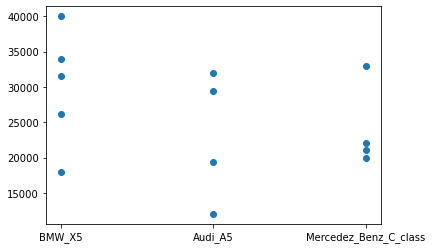

In [77]:
import matplotlib.pyplot as plt
plt.scatter(cmp.Car_Model,cmp.Sell_Price)

In [78]:
dum = pd.get_dummies(cmp.Car_Model)
dum

,Audi_A5,BMW_X5,Mercedez_Benz_C_class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [79]:
cmp = pd.concat([cmp,dum],axis='columns')
cmp

,Car_Model,Mileage,Sell_Price,Age,Audi_A5,BMW_X5,Mercedez_Benz_C_class
0,BMW_X5,69000,18000,6,0,1,0
1,BMW_X5,35000,34000,3,0,1,0
2,BMW_X5,57000,26100,5,0,1,0
3,BMW_X5,22500,40000,2,0,1,0
4,BMW_X5,46000,31500,4,0,1,0
5,Audi_A5,59000,29400,5,1,0,0
6,Audi_A5,52000,32000,5,1,0,0
7,Audi_A5,72000,19300,6,1,0,0
8,Audi_A5,91000,12000,8,1,0,0
9,Mercedez_Benz_C_class,67000,22000,6,0,0,1


In [80]:
cmp = cmp.drop(cmp[['Car_Model','Mercedez_Benz_C_class']],axis='columns')
cmp

,Mileage,Sell_Price,Age,Audi_A5,BMW_X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [81]:
cp = cmp.Sell_Price

In [82]:
cp

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price, dtype: int64

In [86]:
cmp = cmp.drop(cmp[['Sell_Price']],axis='columns')

cmp

In [87]:
cmp

,Mileage,Age,Audi_A5,BMW_X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
model = LinearRegression()

In [90]:
model.fit(cmp,cp)

LinearRegression()

In [92]:
model.score(cmp,cp)

0.9417050937281083

In [93]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cmp,cp)

In [105]:
X_train

,Mileage,Age,Audi_A5,BMW_X5
8,91000,8,1,0
10,83000,7,0,0
11,79000,7,0,0
9,67000,6,0,0
4,46000,4,0,1
3,22500,2,0,1
0,69000,6,0,1
12,59000,5,0,0
2,57000,5,0,1


In [106]:
y_train

8     12000
10    20000
11    21000
9     22000
4     31500
3     40000
0     18000
12    33000
2     26100
Name: Sell_Price, dtype: int64

In [102]:
model.fit(X_train,y_train)

LinearRegression()

In [103]:
model.score(X_train,y_train)

0.9686744037412645

In [104]:
model.predict([[45000,4,0,0]])

array([35658.24615687])